<a href="https://colab.research.google.com/github/punkmic/unsupervised-Sentiment-Analysis---Comparisen-analysis/blob/master/Unsupervised_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intro**

## **Install Dependecies**

In [2]:
# use the %%capture magic option to hide log output
%%capture 
# install dependecies here
!pip install langdetect  # for language detection
!pip install diagrams # for visualize the workflow
!pip install graphviz # for visualize the workflow
!pip install textblob # for unsupervised sentiment analysis
!pip install wordcloud # for wordcloud plot
!pip install matplotlib # for plot
!pip install Pillow # for image manipulation
!pip install nltk # for natural language prepocessing
!pip install enelvo # for fix slangs, abbreviations, spelling errors
!pip install transformers # for machine learning
!pip install gensim # for machile learning
!pip install tabulate # for print as table

## **Load Depencies**

In [3]:
%%capture
# load dependecies here
from langdetect import detect as dt
from diagrams import Diagram as dg
import pandas as pd
from PIL import Image
import os 
import matplotlib.pyplot as plt
import nltk
from tabulate import tabulate

## **Load Dataset**

### **Clone Github repository** 

In [4]:
# Files cloned from github may not automatically appear in files tab in this case right click and choose update
# this will update our files.
!git clone https://github.com/punkmic/unsupervised-Sentiment-Analysis---Comparisen-analysis.git
%cd /content/unsupervised-Sentiment-Analysis---Comparisen-analysis
!ls

fatal: destination path 'unsupervised-Sentiment-Analysis---Comparisen-analysis' already exists and is not an empty directory.
/content/unsupervised-Sentiment-Analysis---Comparisen-analysis
app.py		   Makefile	     results
clear_datasets.py  __pycache__	     Unsupervised_Sentiment_Analysis.ipynb
Drivers		   README.md	     webscraping.py
LICENSE		   requirements.txt  wordclouds


In [5]:
# !git pull 

### **Load csv file**

In [6]:
PATH_TO_CSV = '/content/unsupervised-Sentiment-Analysis---Comparisen-analysis/results/web_scraping_results.csv'
df = pd.read_csv(PATH_TO_CSV, encoding='utf-8')
# lower colnames 
df.rename(columns={'Title':'title', 'Body':'body'}, inplace=True)
df.head()

,title,body
0,Recebi um e-mail que parte do pedido não foi p...,Olá!Preciso da ajuda de vocês para entender qu...
1,Produto falsificado e não me deixam devolver,COMPREI UM PERFUME E QUANDO RECEBI O PRODUTO N...
2,COBRANDO CONTEUDO DIGITAL sem solicitação,"Novamente estava em casa, quando terminei de a..."
3,Cobrança indevida,Fiz a assinatura da amazon prime video no valo...
4,Troquei de telefone e consigo acessar minha conta,"Prezados,Tenho uma conta na Amazon ao qual já ..."


### **Plot some statistics of text**

In [7]:
df.describe()

,title,body
count,10,10
unique,10,10
top,Recebi um e-mail que parte do pedido não foi p...,Olá!Preciso da ajuda de vocês para entender qu...
freq,1,1


### **Plot wordcloud**

In [8]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [9]:
# print currently directory
!pwd

/content/unsupervised-Sentiment-Analysis---Comparisen-analysis


In [10]:
# create a new directory for wordclouds
wordclouds = '/content/unsupervised-Sentiment-Analysis---Comparisen-analysis/results/wordclouds/'
!mkdir wordclouds

mkdir: cannot create directory ‘wordclouds’: File exists


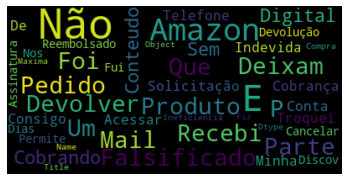

In [11]:
# Create and generate a word cloud image:
text = str(df['title']).title()
wordcloud = WordCloud(max_font_size=50, max_words=100,  stopwords=STOPWORDS).generate(text)

# Save wordcloud 
wordcloud.to_file('wordclouds/title_wordcloud.png')

# Display wordcloud
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



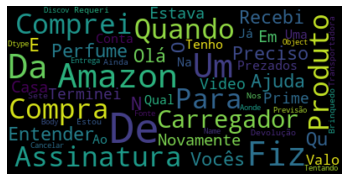

In [12]:

# Create and generate a word cloud image:
text = str(df['body']).title()
wordcloud = WordCloud(max_font_size=50, max_words=100).generate(text)

# Save wordcloud 
wordcloud.to_file('wordclouds/body_wordcloud.png')

# Display wordcloud
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



## **Text Pre-Processing**

Guide
* Lower Case conversion
* Removing Punctuations
* Stop Words Removal
* Rare Words Removal
* Spelling correction
* Tokenization
* Lemmatization



### **Apply enelvo - Normalize noisy words, lowercase the words and remove punctuation.**
Enelvo is a tool for normalising noisy words in user-generated content written in Portuguese -- such as tweets, blog posts, and product reviews. It is capable of identifying and normalising spelling mistakes, internet slang, acronyms, proper nouns, and others.

In [13]:
from enelvo.normaliser import Normaliser
norm = Normaliser(tokenizer='readable', sanitize=True)

In [14]:
def normalising(text):
  """ Normalising noisy words in user-generated content written in Portuguese """
  text_norm =norm.normalise(text)
  return text_norm.lower()

### **Tokenizing**

In [15]:
from nltk.tokenize import word_tokenize
# We need this dataset in order to use the tokenizer
nltk.download('punkt')
import string

def tokenize(text):
  """ Convert text to lowercase and split to a list of words """
  tokens = word_tokenize(text)
  filtered_tokens = [token for token in tokens ] # if token not in string.punctuation
  return filtered_tokens

### **Remove stop words**

In [16]:
from nltk.corpus import stopwords
# download stop words
nltk.download('stopwords')

def remove_stop_words(tokens):
  """ Remove stop words """
  portuguese_stop_words = stopwords.words('portuguese')
  tokens_wo_stop_words = [word for word in tokens if word not in portuguese_stop_words]
  return tokens_wo_stop_words

### **Word Stemming**

In [17]:
from nltk.stem import SnowballStemmer
def stemming(tokens):
  """ Stemming text """
  stemmer = SnowballStemmer('portuguese') 
  stemmed_words = [stemmer.stem(word) for word in tokens]
  return stemmed_words

### **Process text**

In [18]:
def process_text(text):
   text_norm = normalising(text)
   tokens = tokenize(text_norm)
   tokens_wo_stop_words = remove_stop_words(tokens)
   return stemming(tokens_wo_stop_words)

In [19]:
texts = df['body'].map(process_text)
texts[:1]

0    [olá, precis, ajud, entend, problem, receb, em...
Name: body, dtype: object

### **Create a dictionary using the bag of words model**
- Document: some text.
- Corpus: a collection of documents.

In [20]:
from gensim import corpora

# associate each word in the corpus with a unique integer ID.
dictionary = corpora.Dictionary(texts)

# filter out tokens that appear in less than 2 documents 
# filter out tokens that appear in more than 0.9 documents (fraction of total corpus size, not absolute number).
# keep only the first 100000 most frequent tokens.
dictionary.filter_extremes(no_below=3, no_above=0.5, keep_n=100000)

# create the bag-of-word representation for documents
corpus = [dictionary.doc2bow(text) for text in texts]

# the first entry in each tuple corresponds to the ID of the token in the dictionary
# the second corresponds to the count of this token.
print(corpus)

[[(0, 2), (1, 1), (2, 3)], [(3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 3), (10, 1)], [(2, 1), (7, 1), (8, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)], [(0, 2), (2, 3), (10, 1), (11, 2), (15, 1), (16, 1)], [(7, 1), (13, 1), (14, 1)], [(3, 3), (4, 1), (6, 1), (7, 1), (9, 2), (12, 1), (14, 1), (16, 2)], [(1, 1), (5, 1), (9, 2), (17, 1)], [(0, 2), (6, 1), (8, 1), (10, 1), (11, 2), (13, 1), (17, 7)], [(3, 1), (4, 2), (5, 2), (9, 3), (10, 1)], [(1, 1), (7, 1), (9, 1), (12, 1), (14, 1), (15, 2), (16, 1), (17, 1)]]


### **Preview Bag Of Words**

In [21]:
# print how many times each word appear
bow_doc = corpus[0] 
table = []
for i in range(len(bow_doc)):
    index = bow_doc[i][0]
    word = dictionary[bow_doc[i][0]]
    times = bow_doc[i][1]
    table.append([index, word, times])
print(tabulate(table,headers=["Word ID", "Word", "Times"], tablefmt="github"))

|   Word ID | Word   |   Times |
|-----------|--------|---------|
|         0 | cobr   |       2 |
|         1 | ped    |       1 |
|         2 | valor  |       3 |


### **Train an LDA model with 5 clusters**

In [22]:
from gensim import models

NUM_TOPICS = 5

# train the model
lda_model = models.ldamodel.LdaModel(corpus, num_topics=NUM_TOPICS, id2word=dictionary, passes=15)

In [23]:
# print the score and topics in one document sorted by topic score
for index, score in sorted(lda_model[corpus[5]], key=lambda x:x[1], reverse=True):
    print(f"\nScore: {score}\t \nTopic: {lda_model.print_topic(index, 10)}")


Score: 0.9377323985099792	 
Topic: 0.130*"devolu" + 0.130*"porém" + 0.130*"produt" + 0.089*"nad" + 0.089*"send" + 0.089*"nov" + 0.089*"pois" + 0.049*"ped" + 0.049*"inform" + 0.049*"dias"

Score: 0.015898389741778374	 
Topic: 0.294*"produt" + 0.151*"dias" + 0.151*"dinheir" + 0.079*"quer" + 0.079*"devolu" + 0.052*"ped" + 0.043*"inform" + 0.043*"pod" + 0.043*"nad" + 0.008*"valor"

Score: 0.015531262382864952	 
Topic: 0.151*"nad" + 0.151*"outr" + 0.151*"pois" + 0.082*"pod" + 0.082*"send" + 0.082*"nov" + 0.082*"assinatur" + 0.082*"valor" + 0.014*"ped" + 0.014*"cancel"

Score: 0.015428375452756882	 
Topic: 0.418*"cancel" + 0.112*"assinatur" + 0.112*"cobr" + 0.061*"inform" + 0.061*"pod" + 0.061*"quer" + 0.061*"outr" + 0.010*"ped" + 0.010*"produt" + 0.010*"dinheir"

Score: 0.01540958508849144	 
Topic: 0.320*"valor" + 0.217*"cobr" + 0.114*"assinatur" + 0.062*"quer" + 0.062*"send" + 0.062*"porém" + 0.049*"ped" + 0.010*"nad" + 0.010*"outr" + 0.010*"pois"


### **Visualization of topics**

### **Train a TF-IDF Model**

The tf-idf model transforms vectors from the bag-of-words representation to a vector space where the frequency counts are weighted according to the relative rarity of each word in the corpus.

More rarity a word is more weighted a word is.

In [24]:
# train the model
tfidf = models.TfidfModel(corpus, id2word=dictionary)

In [25]:
# print the weight of each word in one document sorted by weight
table = []
for id, weight in sorted(tfidf[corpus[5]], key=lambda x: x[1], reverse=True):
    word = dictionary[id]
    table.append([id, word, weight])
print(tabulate(table, headers=["Word ID","Word", "TF-IDF Weight"], tablefmt="github"))

|   Word ID | Word   |   TF-IDF Weight |
|-----------|--------|-----------------|
|         3 | devolu |        0.702508 |
|        16 | porém  |        0.468338 |
|         9 | produt |        0.26963  |
|         4 | dias   |        0.234169 |
|         6 | inform |        0.234169 |
|        12 | nov    |        0.234169 |
|        14 | pois   |        0.178216 |
|         7 | nad    |        0.134815 |


### **Similarity**

In [26]:
from gensim import similarities

index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=12)

In [ ]:
query_document = 'system engineering'.split()
query_bow = dictionary.doc2bow(query_document)
sims = index[tfidf[query_bow]]
print(list(enumerate(sims)))

### **Topic Modeling**

Gensin
- LSA, LDA
NTKL
Spacy
Scikit-learn

### **Latent Semantic Analysis (LSA)** 

### **Latent Dirichlet Allocation (LDA)**

BERTimbau

In [ ]:
from transformers import AutoModel, AutoTokenizer

In [ ]:
# BERT Base
tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')
model = AutoModel.from_pretrained('neuralmind/bert-base-portuguese-cased')

### **Texblob**

In [ ]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
def get_blob_sentiment(sentence):
  blob = TextBlob(sentence).sentiment
  return blob.polarity

### **Vader**

In [ ]:
nltk.download('vader_lexicon')

In [ ]:
def get_vader_sentiment(sentence):
  vader = sid.polarity_scores(sentence)
  return vader['compound']

In [ ]:
df['TextBlob'] = df['body'].apply(lambda sentence: get_blob_sentiment(sentence))
df['Vader'] = df['body'].apply(lambda sentence: get_vader_sentiment(sentence))

A negative sentiment score means 
negative sentiment, and a positive sentiment score means positive sentiment. The higher 
the absolute value of the score, the more confident the system is about it

In [ ]:
df.head(10)

### **Clustering sentences with K-Means**

In [ ]:
import re
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split

## **Save Models to Google Cloud Storage**

In [ ]:
# import google cloud dependencies
from google.colab import auth
import uuid # for generate a unique identification for google bucket
# Define a project id in google cloud
project_id = '<project_ID>'

auth.authenticate_user()
# configure gsutil
## !gcloud config set project {project_id}
# set bucket name
##backet_name = f'sample-bucket-{uuid.uuid1()}'
## !gsuit mb gs://{bucket_name}

In [ ]:
# upload model to Google Cloud Storage
!gsuit cp /tmp/name_of_file.txt gs://{bucket_name}/

# location of model
download_location = f"https://console.cloud.google.com/storage/browser?project={project_id}"

# donwload model from Google Cloud Storage
!gsuit cp gs://{bucket_name}/{filename} {download_location}

## **References**


[LangDetect](https://pypi.org/project/langdetect/) <br/>
[Diagrams](https://pypi.org/project/diagrams/) <br/>
[Graphviz](https://pypi.org/project/graphviz/) <br/>
[Beautifulsoap4](https://pypi.org/project/beautifulsoup4/) <br/>
[OpLexicon](https://www.inf.pucrs.br/linatural/wordpress/recursos-e-ferramentas/oplexicon/)